In [11]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [12]:
sp.init_printing()

In [13]:
x = sp.Symbol('x', real = True)
k = sp.Symbol('k', real = True, positive = True)
a = sp.Symbol('a', real = True)
psi = sp.Function('\psi')

x, k, a, psi(x)

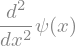

In [14]:
psi(x).diff(x, 2)

In [15]:
-k**2 * psi(x)

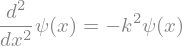

In [16]:
eq = sp.Eq(psi(x).diff(x, x), -k**2 * psi(x))
eq

In [17]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0, psi(a): 0})
sol

In [18]:
sol = sp.dsolve(eq, psi(x), ics = {psi(0): 0})
sol